# Prediction using Supervised ML

## Objective : Predict the percentage of an student based on the no. of study hours.

- This is a simple linear regression task as it involves just 2 variables.
- What will be predicted score if a student studies for 10 hrs/ day?

## Importing all libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

## Loading Dataset

In [3]:
df = pd.read_csv("score.csv")

In [4]:
df

,hour,score
0,3.0,32
1,5.6,45
2,2.3,18
3,9.0,78
4,6.7,60
5,3.4,35
6,4.0,40
7,1.1,12
8,8.5,70
9,7.2,63


In [5]:
df.head()

,hour,score
0,3.0,32
1,5.6,45
2,2.3,18
3,9.0,78
4,6.7,60


In [6]:
df.tail()

,hour,score
7,1.1,12
8,8.5,70
9,7.2,63
10,6.9,61
11,5.8,48


## Inspecting Data

- The data has 12 rows and 2 attributes

In [7]:
df.shape

(12, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    12 non-null     float64
 1   score   12 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


In [8]:
df.isna().sum()

hour     0
score    0
dtype: int64

In [10]:
df.describe()

,hour,score
count,12.000000,12.000000
mean,5.291667,46.833333
std,2.515934,20.448753
min,1.100000,12.000000
25%,3.300000,34.250000
50%,5.700000,46.500000
75%,6.975000,61.500000
max,9.000000,78.000000


## Exploratory Data Analysis

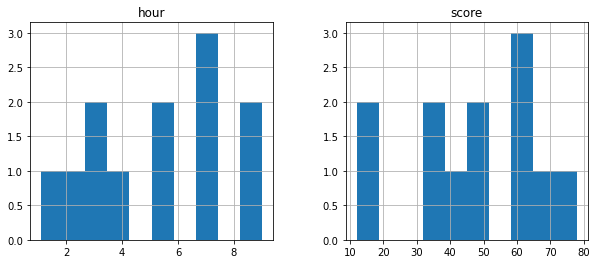

In [11]:
df.hist(figsize=(10,4))
plt.show()

## The graphs are bimodal

C:\Users\Tanuja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


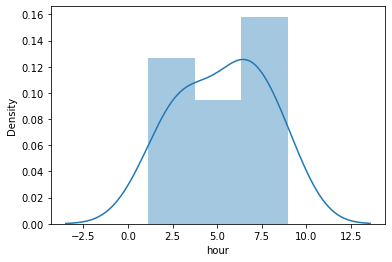

In [15]:
sns.distplot(df['hour'])
plt.show()

C:\Users\Tanuja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


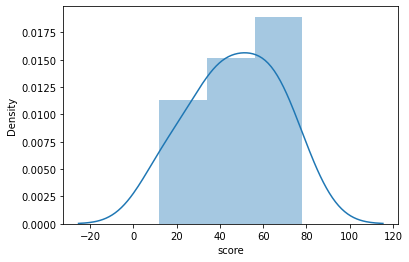

In [16]:
sns.distplot(df['score'])
plt.show()

## It seems to have linear relation between scores and hours

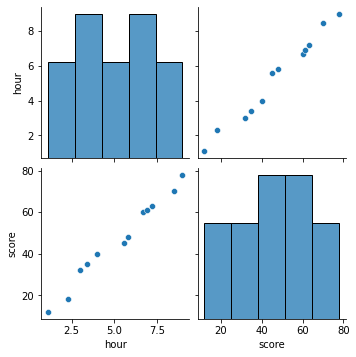

In [17]:
sns.pairplot(df)
plt.show()

## Let's analyse in detail

- From the graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

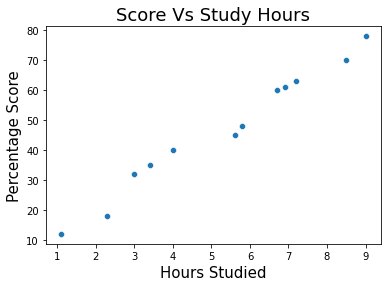

In [18]:
sns.scatterplot(y= df['score'], x= df['hour'])
plt.title('Score Vs Study Hours', size=18)
plt.ylabel('Percentage Score', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

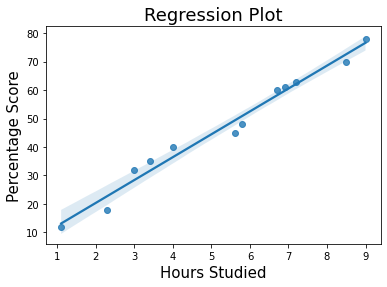

In [19]:
sns.regplot(x= df['hour'], y= df['score'])
plt.title('Regression Plot',size=18)
plt.ylabel('Percentage Score', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

## It has high positive correlation

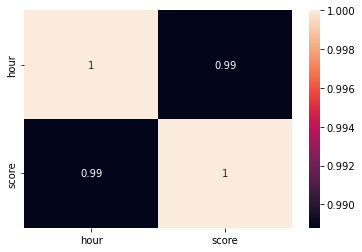

In [20]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Train the Model using Linear Regression

## Preparing data

- Divide the data into "attributes" (inputs) and "labels" (outputs).

In [21]:
x = df.iloc[:, :-1].values  
x

array([[3. ],
       [5.6],
       [2.3],
       [9. ],
       [6.7],
       [3.4],
       [4. ],
       [1.1],
       [8.5],
       [7.2],
       [6.9],
       [5.8]])

In [22]:
y = df.iloc[:, 1].values 
y

array([32, 45, 18, 78, 60, 35, 40, 12, 70, 63, 61, 48], dtype=int64)

## Split the data into training and test sets

In [23]:
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9, 1)
(3, 1)
(9,)
(3,)


## Training Model

In [25]:
from sklearn.linear_model import LinearRegression  

lin = LinearRegression()  
lin.fit(x_train, y_train) 

print("Training complete.")

Training complete.


## Making Prediction

In [27]:
y_pred = lin.predict(x_test) 
y_pred

array([36.11622792, 50.67232862, 57.95037897])

## Comparing Actual vs Predicted

In [31]:
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_output 

,Actual,Predicted
0,40,36.116228
1,48,50.672329
2,60,57.950379


## Evaluating The Model

In [32]:
from sklearn.metrics import mean_absolute_error  
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 2.868573909905031


## Visualize Result

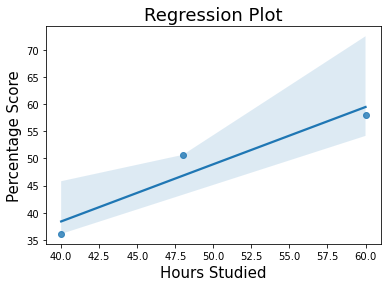

In [33]:
sns.regplot(x= y_test , y= y_pred)
plt.title('Regression Plot',size=18)
plt.ylabel('Percentage Score', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

## What will be predicted score if a student studies for 10 hrs/ day?

In [36]:
hours = [10]
result = lin.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(result[0]))

No of Hours = [10]
Predicted Score = 84.63656357853421
